# <font color="darkblue"> Prática 01: Perceptron Learning Algorithm (PLA) </font>




**Objetivos:**


*   Entender o funcionamento do PLA e dos componentes de aprendizagem.
*   Fixar o conceito de aprendizagem.



**Descrição:**

Crie uma dataset $D$ com 1000 pontos e uma função alvo $f$ para compreender o funcionamento do PLA. Para visualizar os passos do algoritmo, considere $d=2$ e assuma $X=[-1,1]\times[-1,1]$, em que $x\in X$ é escolhido com probabilidade uniforme. Escolha uma reta como função alvo, em que um lado da reta seja mapeado para $+1$ e o outro para $-1$. Gere então pontos aleatórios $x_i$ e obtenha sua classificação $y_i$ a partir da função alvo. Divida os dados em um grupo de treinamento e outro de teste.

Após a preparação dos dados, crie uma função $PLA()$ que inicia com os pesos todos iguais a zero e, a cada iteração, deixe o algoritmo escolher aleatoriamente um dos pontos com classificação incorreta até que ele convirja. Rode o PLA sobre amostras com $N=10$ e $N=100$, teste a hipótese solução a partir de pontos diferentes (conjunto de teste) daqueles das amostras e responda a seguinte questão:

- Qual o percentual de pontos classificados corretamente para cada hipótese solução?










# <font color="darkblue"> Solução </font>


###  Preparação dos dos dados

O objetivo da prepação dos dados é a criação da função alvo e do dataset conforme a descrição do problema. Para tanto, você deve realizar os seguintes passos:

* Crie a função alvo (uma reta) a partir de dois pontos gerados aleatoriamente;
* Calcule o coeficiente angular e o coeficiente linear (bias) e os armazene em variáveis distintas;
* Gere aleatoriamente 1000 pontos, cujas coordenadas estão no intervalo $[-1,1]$, e os adicione em uma lista $X$ correspondendo aos dados da amostra;
* Para cada ponto gerado, use a função sign() de numpy, que recebe como entrada uma reta (função alvo), para obter a classificação de cada ponto. Adicione cada classificação em uma lista $y$.


**************** =========

**c***y - **m***x **- b** = 0

W = (-b, m, c)  
W = (w_0, w_1, w_2)


In [121]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [122]:
def show_dataset(X, y, p1, p2, m, b):
    """
    Esta função tem o objetivo de exibir na tela uma amostra do dataset passado por parâmetro.

    Paramêtros:
    - X (matriz): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - p1 (list): Coordenadas do ponto p1 gerado para criar a função alvo.
    - p2 (list): Coordenadas do ponto p2 gerado para criar a função alvo.
    - m (float): Coeficiente angular da função alvo.
    - b (float): Coeficidnte linear da função alvo.
    """

    line = np.linspace(-1, 1, 1000)
    plt.axis([-1.05, 1.05, -1.05, 1.05])
    plt.plot(line, m*line + b, label="f(x)", c="green")

    # Pontos usados na criacao da reta
    plt.scatter(p1[0], p1[1], c='green')
    plt.scatter(p2[0], p2[1], c='green')

    for i in range(len(X[:200])):
        if (y[i] == 1):
            plt.scatter(X[i][1], X[i][2], c='blue')
        else:
            plt.scatter(X[i][1], X[i][2], c='red')

    plt.show()

In [123]:
p1 = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)]
p2 = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)]

m = (p2[1] - p1[1]) / (p2[0] - p1[0])
b = p1[1] - m*p1[0]

f = [m, b]

In [140]:
# 100 pontos aleatórios no intervalo [-1, 1]
X = []
y = []

for _ in range(1000):
    x = [1, random.uniform(-1, 1), random.uniform(-1, 1)]
    X.append(x)

    f_x = m*x[1] + b

    y.append(np.sign(x[2] - f_x))

### Visualizando o dataset
Use a função abaixo para visualizar o dataset criado anteriormente.

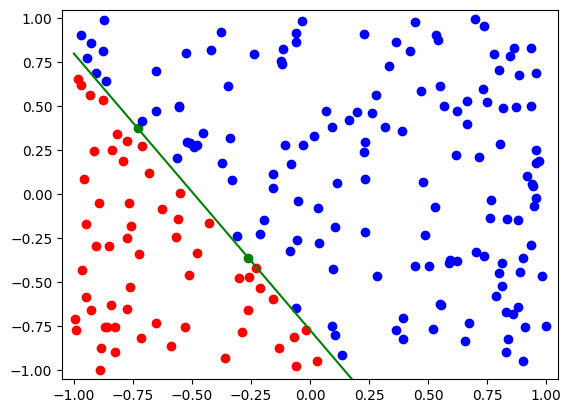

In [141]:
show_dataset(X, y, p1, p2, m, b)

### Algoritmo PLA
Complete a função PLA() abaixo para implementar o Algoritmo de Aprendizagem do Perceptron conforme os slides da aula de "Significado de aprendizagem".

In [142]:
def PLA(X: np.array, y: np.array):
    """
    Esta função corresponde ao Algoritmo de Aprendizagem do modelo Perceptron.

    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear
    da função alvo.

    Retorno:
    - it (int): Quantidade de iterações necessárias para corrigir todos os pontos classificados incorretamente.
    - w (list): Lista de três elementos correspondendo aos pesos do perceptron.
    """
    w = np.zeros(3)

    PCI = X.copy()
    y_orig = y.copy()

    runs = 0
    while (len(PCI) > 0):
        print("Iteração", runs)
        i = np.random.randint(len(PCI))
        x = PCI[i]

        for j in range(len(w)):
            w[j] += x[j]*y[i]
            
        PCI, y = constroiListaPCI(X, y_orig, w)
        
        # Após atualizar os pesos para correção do ponto escolhido, você irá chamar a função plotGrafico()
        plot_grafico(X, y, w, f)
        runs += 1


    return w

### Função para visualização dos passos do PLA
A função abaixo é uma função auxiliar que permite que vocês enxerguem o resultado de cada iteração da função PLA().

In [143]:
%matplotlib inline
def plot_grafico(X, y, w, f):
    """
    Esta função objetiva a visualização dos passos do PLA.

    Paramêtros:
    - X (list[]): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear
    da função alvo.
    """

    nPontos = len(X)
    #matplotlib.use('TkAgg')

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.axis([-1.05, 1.05, -1.05, 1.05])

    x_plt = [X[i][1] for i in range(nPontos)]
    y_plt = [X[i][2] for i in range(nPontos)]

    for i in range(min(nPontos, len(y))):
        if (y[i] == 1):
            plt.scatter(x_plt[i], y_plt[i], s=10, c='blue')
        else:
            plt.scatter(x_plt[i], y_plt[i], s=10, c='red')

    x = np.linspace(-1, 1, 1000)
    plt.plot(x, f[0]*x + f[1], c='green') # f[0] = m, f[1] = b
    plt.plot(x, (-w[0] - w[1]*x) / w[2], c='orange') # A*x + B*y + C => y = (-C - A*x) / B
    clear_output(wait=True)
    plt.show(block=False)
    plt.pause(0.01)


### Função para construir lista de pontos classificados incorretamente
Implemente a função abaixo para contruir a lista de pontos classificados incorretamente em cada iteração do loop principal da função PLA().


In [144]:
def constroiListaPCI(X, y, w):
    """
    Esta função constrói a lista de pontos classificados incorretamente.

    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.

    Retorno:
    - l (list): Lista com os pontos classificador incorretamente.
    - new_y (list): Nova classificação de tais pontos.

    """
    h = np.sign(np.dot(X, w))
    l = []
    new_y = []

    for i in range(len(h)):
        if (h[i] != y[i]):
            l.append(X[i])
            new_y.append(y[i])

    return np.array(l), np.array(new_y)

### Calculando a acurácia

Treine o Modelo de Aprendizagem de Máquina Perceptron com subamostras de tamanhos $N=10$ e $N = 100$, conforme o enunciado, e em seguida verifique a acurácia do modelo com uma subamostra de teste que contém pontos diferentes das subamostras utilizadas para treinamento.

In [145]:
def separa_dados(X, y, train_size, test_size):
    """
    Esta função tem o objetivo de separar os dados em conjuntos de treino e teste.

    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - train_size (float): Proporção dos dados que serão utilizados para treino.
    - test_size (float): Proporção dos dados que serão utilizados para teste.

    Retorno:
    - X_train (list[]): Matriz correspondendo aos dados amostra de treino.
    - y_train (list): Classificação dos pontos da amostra de treino.
    - X_test (list[]): Matriz correspondendo aos dados amostra de teste.
    - y_test (list): Classificação dos pontos da amostra de teste.
    """

    X = np.array(X)
    y = np.array(y)

    n = len(X)
    n_train = int(n*train_size)
    n_test = int(n*test_size)

    indices = np.random.permutation(n)
    train_indices = indices[:n_train]
    test_indices = indices[n_train:n_train+n_test]

    X_train = X[train_indices]
    y_train = y[train_indices]

    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, y_train, X_test, y_test

In [146]:
def precisao(X, y, w):
    """
    Esta função tem o objetivo de calcular a precisão do modelo.

    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.

    Retorno:
    - acc (float): Precisão do modelo.
    """
    h = np.sign(np.dot(X, w))
    acc = np.sum(h == y) / len(y)

    return acc

In [149]:
X_train, y_train, X_test, y_test = separa_dados(X, y, 0.01, 0.5) # 1000 * 0.01 = 10 amostras de treino

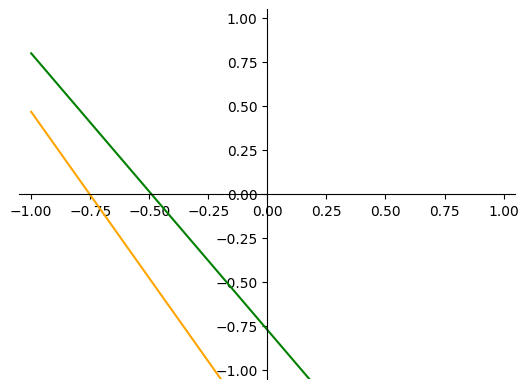

Precisão do modelo com 10 amostras de treino: 0.894
Pesos do modelo: [1.         1.32907973 0.70282613]


In [151]:
weights_10 = PLA(X_train, y_train)
print("Precisão do modelo com 10 amostras de treino:", precisao(X_test, y_test, weights_10))
print("Pesos do modelo:", weights_10)

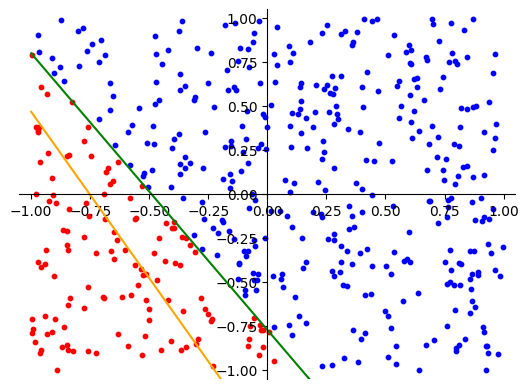

In [152]:
plot_grafico(X_test, y_test, weights_10, f) # comparando com a função alvo

In [153]:
X_train, y_train, X_test, y_test = separa_dados(X, y, 0.1, 0.5) # 1000 * 0.1 = 100 amostras de treino

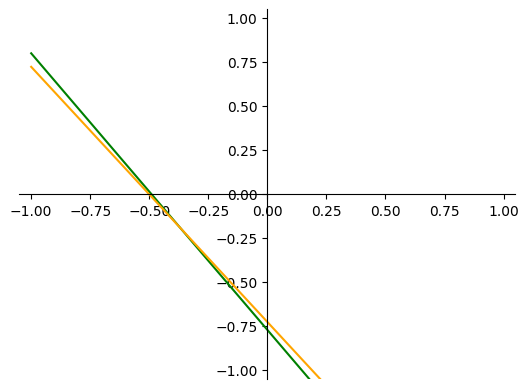

Precisão do modelo com  dos dados de treino: 0.99
Pesos do modelo: [3.         5.99092113 4.13248069]


In [154]:
weights_100 = PLA(X_train, y_train)
print("Precisão do modelo com  dos dados de treino:", precisao(X_test, y_test, weights_100))
print("Pesos do modelo:", weights_100)

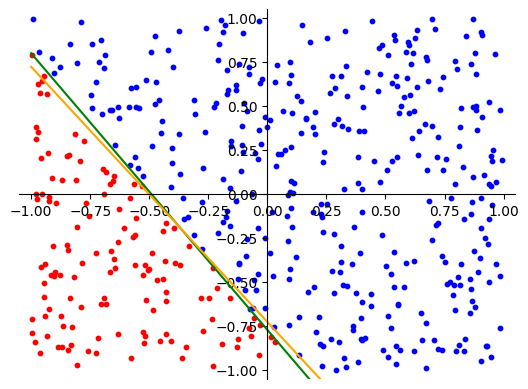

In [155]:
plot_grafico(X_test, y_test, weights_100, f) # comparando com a função alvo